In [158]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [159]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [160]:
data = pd.read_csv("C:/Users/LIKITHA M/Downloads/archive (9)/Titanic-Dataset.csv")

In [161]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [162]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [163]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [164]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


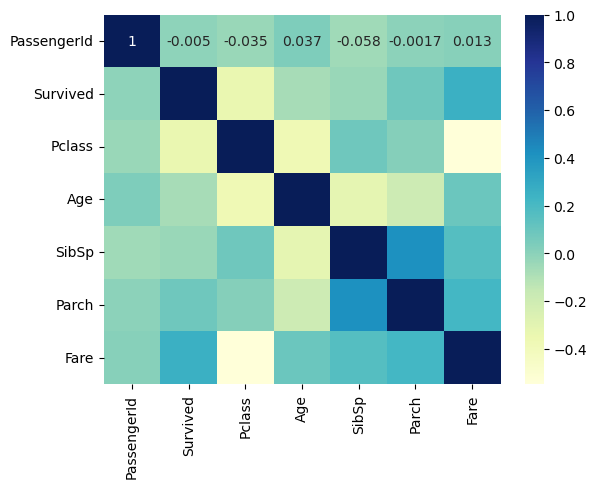

In [165]:
import seaborn as sns

import matplotlib.pyplot as plt
import numpy as np

numeric_data = data.select_dtypes(include=[np.number])

corr_matrix = numeric_data.corr()


sns.heatmap(corr_matrix, cmap="YlGnBu", annot=True)
plt.show()

In [166]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2)
for train_indices, test_indices in split.split(data,data[["Survived","Pclass","Sex"]]):
    strat_train_set = data.loc[train_indices]
    strat_test_set = data.loc[test_indices]
    

In [167]:
strat_test_set

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
810,811,0,3,"Alexander, Mr. William",male,26.0,0,0,3474,7.8875,NaN,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
288,289,1,2,"Hosono, Mr. Masabumi",male,42.0,0,0,237798,13.0000,NaN,S
620,621,0,3,"Yasbeck, Mr. Antoni",male,27.0,1,0,2659,14.4542,NaN,C
56,57,1,2,"Rugg, Miss. Emily",female,21.0,0,0,C.A. 31026,10.5000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
517,518,0,3,"Ryan, Mr. Patrick",male,NaN,0,0,371110,24.1500,NaN,Q
470,471,0,3,"Keefe, Mr. Arthur",male,NaN,0,0,323592,7.2500,NaN,S
128,129,1,3,"Peter, Miss. Anna",female,NaN,1,1,2668,22.3583,F E69,C
225,226,0,3,"Berglund, Mr. Karl Ivar Sven",male,22.0,0,0,PP 4348,9.3500,NaN,S


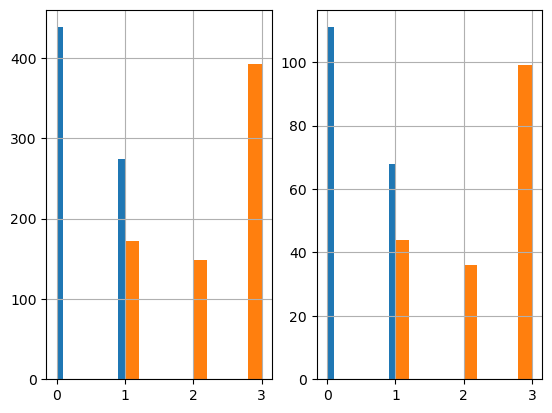

In [168]:
plt.subplot(1,2,1)
strat_train_set['Survived'].hist()
strat_train_set['Pclass'].hist()

plt.subplot(1,2,2)
strat_test_set['Survived'].hist()
strat_test_set['Pclass'].hist()

plt.show()

In [169]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

class AgeImputer(BaseEstimator , TransformerMixin):
    def fit(self , X ,y=None):
        return self
    def transform(self,X):
        imputer = SimpleImputer(strategy="mean")
        X['Age'] = imputer.fit_transform(X[['Age']])
        return X

In [170]:
from sklearn .preprocessing import OneHotEncoder

class FeatureEncoder(BaseEstimator,TransformerMixin):
    def fit(self,X,y=None):
        return self

    def transform(self,X):
        encoder = OneHotEncoder()
        matrix = encoder.fit_transform(X[['Embarked']]).toarray()

        column_names=["C","S","Q","N"]
        
        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]
            
        matrix=encoder.fit_transform(X[['Sex']]).toarray()

        column_names=["Female","Male"]

        for i in range(len(matrix.T)):
            X[column_names[i]]=matrix.T[i]

        return X

    

In [171]:
class FeatureDropper(BaseEstimator,TransformerMixin):
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        return X.drop(["Embarked","Name","Ticket","Cabin","Sex","N"],axis=1,errors="ignore")

In [172]:
strat_train_set = pipeline.fit_transform(strat_train_set)

In [173]:
strat_train_set

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
760,761,0,3,29.358829,0,0,14.5000,0.0,0.0,1.0,0.0,1.0
243,244,0,3,22.000000,0,0,7.1250,0.0,0.0,1.0,0.0,1.0
824,825,0,3,2.000000,4,1,39.6875,0.0,0.0,1.0,0.0,1.0
69,70,0,3,26.000000,2,0,8.6625,0.0,0.0,1.0,0.0,1.0
823,824,1,3,27.000000,0,1,12.4750,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
394,395,1,3,24.000000,0,2,16.7000,0.0,0.0,1.0,1.0,0.0
664,665,1,3,20.000000,1,0,7.9250,0.0,0.0,1.0,0.0,1.0
442,443,0,3,25.000000,1,0,7.7750,0.0,0.0,1.0,0.0,1.0
806,807,0,1,39.000000,0,0,0.0000,0.0,0.0,1.0,0.0,1.0


In [174]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 760 to 453
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Age          712 non-null    float64
 4   SibSp        712 non-null    int64  
 5   Parch        712 non-null    int64  
 6   Fare         712 non-null    float64
 7   C            712 non-null    float64
 8   S            712 non-null    float64
 9   Q            712 non-null    float64
 10  Female       712 non-null    float64
 11  Male         712 non-null    float64
dtypes: float64(7), int64(5)
memory usage: 72.3 KB


In [175]:
from sklearn.preprocessing import StandardScaler

X=strat_train_set.drop(['Survived'],axis=1)
y=strat_train_set['Survived']

scaler = StandardScaler()
X_data=scaler.fit_transform(X)
y_data=y.to_numpy()

In [176]:
#train and evaluate 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier()
param_grid = [
    {"n_estimators": [10, 100, 200, 500], "max_depth": [None, 5, 10], "min_samples_split": [2, 3, 4]}
]


In [177]:

grid_search = GridSearchCV(clf, param_grid, cv=3, scoring="accuracy", return_train_score=True)

In [178]:
grid_search.fit(X_data,y_data)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [179]:
final_clf=grid_search.best_estimator_

In [180]:
final_clf

RandomForestClassifier(max_depth=5, min_samples_split=3)

In [181]:
strat_test_set = pipeline.fit_transform(strat_test_set)

In [182]:
strat_test_set

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
810,811,0,3,26.000000,0,0,7.8875,0.0,0.0,1.0,0.0,1.0
672,673,0,2,70.000000,0,0,10.5000,0.0,0.0,1.0,0.0,1.0
288,289,1,2,42.000000,0,0,13.0000,0.0,0.0,1.0,0.0,1.0
620,621,0,3,27.000000,1,0,14.4542,1.0,0.0,0.0,0.0,1.0
56,57,1,2,21.000000,0,0,10.5000,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
517,518,0,3,31.069859,0,0,24.1500,0.0,1.0,0.0,0.0,1.0
470,471,0,3,31.069859,0,0,7.2500,0.0,0.0,1.0,0.0,1.0
128,129,1,3,31.069859,1,1,22.3583,1.0,0.0,0.0,1.0,0.0
225,226,0,3,22.000000,0,0,9.3500,0.0,0.0,1.0,0.0,1.0


In [183]:
X_test = strat_test_set.drop(['Survived'],axis=1)
y_test = strat_test_set['Survived']

scaler = StandardScaler()
X_data_test = scaler.fit_transform(X_test)
y_data_test = y_test.to_numpy()

In [184]:
final_clf.score(X_data_test,y_data_test)

0.8491620111731844

In [185]:
final_data=pipeline.fit_transform(data)

In [186]:
final_data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
0,1,0,3,22.000000,1,0,7.2500,0.0,0.0,1.0,0.0,1.0
1,2,1,1,38.000000,1,0,71.2833,1.0,0.0,0.0,1.0,0.0
2,3,1,3,26.000000,0,0,7.9250,0.0,0.0,1.0,1.0,0.0
3,4,1,1,35.000000,1,0,53.1000,0.0,0.0,1.0,1.0,0.0
4,5,0,3,35.000000,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,0.0,0.0,1.0,0.0,1.0
887,888,1,1,19.000000,0,0,30.0000,0.0,0.0,1.0,1.0,0.0
888,889,0,3,29.699118,1,2,23.4500,0.0,0.0,1.0,1.0,0.0
889,890,1,1,26.000000,0,0,30.0000,1.0,0.0,0.0,0.0,1.0


In [187]:
X_final=final_data.drop(['Survived'],axis=1)
y_final =final_data['Survived']

scaler = StandardScaler()
X_data_final = scaler.fit_transform(X_final)
y_data_final =y_final.to_numpy()

In [199]:
prod_clf = RandomForestClassifier()
param_grid = [
    {"n_estimators": [10, 100, 200, 500], "max_depth": [None, 5, 10], "min_samples_split": [2, 3, 4]}
]
grid_search = GridSearchCV(prod_clf, param_grid, cv=3, scoring="accuracy", return_train_score=True)
grid_search.fit(X_data_final,y_data_final)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [200]:
prod_final_clf = grid_search.best_estimator_

In [201]:
prod_final_clf

RandomForestClassifier(max_depth=5, min_samples_split=3, n_estimators=500)

In [202]:
titanic_test_data = pd.read_csv("C:/Users/LIKITHA M/Downloads/test.csv")

In [203]:
final_test_data = pipeline.fit_transform(titanic_test_data)

In [204]:
final_test_data

,PassengerId,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
0,892,3,34.50000,0,0,7.8292,0.0,1.0,0.0,0.0,1.0
1,893,3,47.00000,1,0,7.0000,0.0,0.0,1.0,1.0,0.0
2,894,2,62.00000,0,0,9.6875,0.0,1.0,0.0,0.0,1.0
3,895,3,27.00000,0,0,8.6625,0.0,0.0,1.0,0.0,1.0
4,896,3,22.00000,1,1,12.2875,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,30.27259,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
414,1306,1,39.00000,0,0,108.9000,1.0,0.0,0.0,1.0,0.0
415,1307,3,38.50000,0,0,7.2500,0.0,0.0,1.0,0.0,1.0
416,1308,3,30.27259,0,0,8.0500,0.0,0.0,1.0,0.0,1.0


In [205]:
final_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Age          418 non-null    float64
 3   SibSp        418 non-null    int64  
 4   Parch        418 non-null    int64  
 5   Fare         417 non-null    float64
 6   C            418 non-null    float64
 7   S            418 non-null    float64
 8   Q            418 non-null    float64
 9   Female       418 non-null    float64
 10  Male         418 non-null    float64
dtypes: float64(7), int64(4)
memory usage: 36.1 KB


In [206]:
X_final_test = final_test_data
X_final_test = X_final_test.fillna(method="ffill")

scaler = StandardScaler()
X_data_final_test = scaler.fit_transform(X_final_test)

In [207]:
predictions = prod_final_clf.predict(X_data_final_test)

In [208]:
predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [210]:
final_df = pd.DataFrame(titanic_test_data['PassengerId'])
final_df['Survived'] = predictions
final_df.to_csv("C:/Users/LIKITHA M/Downloads/titanic_data/predictions.csv",index=False)

In [211]:
final_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [189]:
from sklearn.pipeline import Pipeline

pipeline =Pipeline([("ageimputer",AgeImputer()),
                    ("featureencoder",FeatureEncoder()),
                    ("featuredropper",FeatureDropper())])

In [190]:
data['Age'].fillna(data['Age'].median(), inplace=True) # Fill missing ages with the median
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

In [191]:
label_encoder = LabelEncoder()

In [192]:
data['Sex'] = label_encoder.fit_transform(data['Sex'])

In [193]:
data['Embarked'] = label_encoder.fit_transform(data['Embarked'])

In [194]:
features = ['Pclass', 'Age', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = data[features]
y = data['Survived']

In [195]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [196]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [197]:
y_pred = model.predict(X_test)

In [198]:
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Confusion Matrix:\n{confusion}')
print(f'Classification Report:\n{report}')

Accuracy: 0.81
Confusion Matrix:
[[90 15]
 [19 55]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

